<a href="https://colab.research.google.com/github/Samapti25/solar/blob/main/carringtonmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive

In [ ]:
!git clone https://github.com/Samapti25/solar.git


Cloning into 'solar'...
fatal: could not read Username for 'https://github.com': No such device or address


In [16]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sunpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [10]:
!pip install astropy


In [11]:
!pip install drms

In [ ]:
!pip install aiapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.9 MB/s eta 0:00:00


In [12]:
!pip install sunpy[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.2/962.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 k

In [13]:
import os
from astropy.io import fits
import sunpy.map
from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label





In [17]:
folder_path = "/content/drive/MyDrive/data folder"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))

In [20]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data

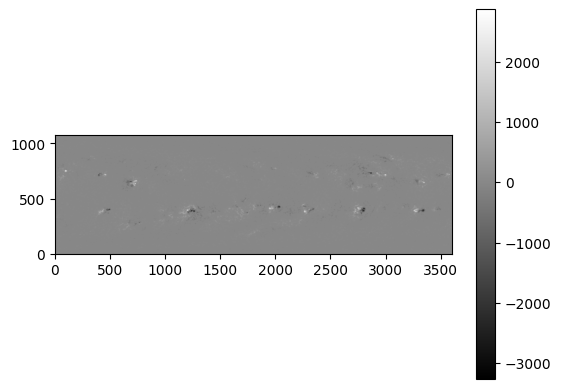

In [21]:
fig = plt.figure()
plt.imshow(data, origin="lower", cmap='gray')
plt.colorbar()

In [22]:
nx=data.shape[1]
ny=data.shape[0]
longitude=np.linspace(0,360,nx)
sin_lat=np.linspace(-1,1,ny)



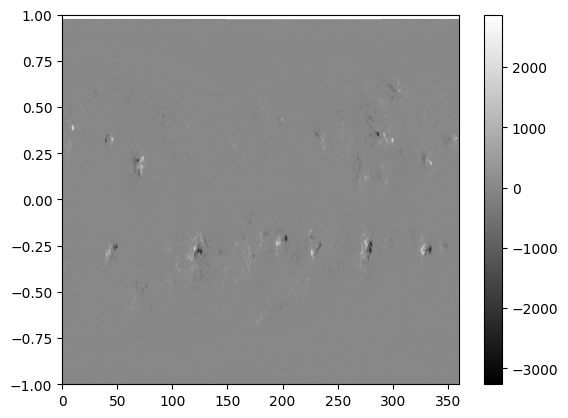

In [23]:
fig = plt.figure()
plt.imshow(data, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect="auto")
plt.colorbar()

In [24]:
threshold=100
binary_mask=np.abs(data)>threshold

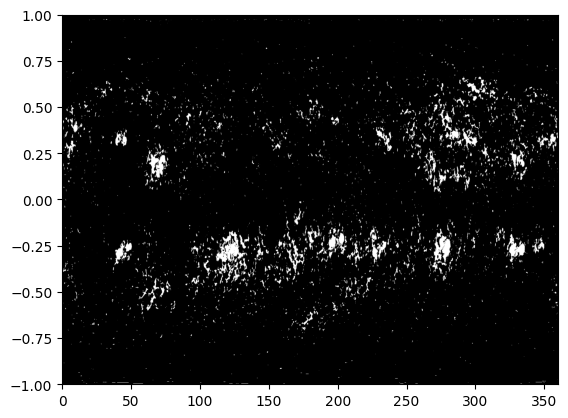

In [25]:
plt.imshow(binary_mask, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect="auto"  )


In [26]:
labeled_array, num_features = label(binary_mask)
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))

In [27]:
areathres=700
mask_filtered = np.zeros_like(binary_mask)
print(mask_filtered)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [28]:
for i, size in enumerate(sizes):
  if size >=areathres:
    mask_filtered[labeled_array == (i + 1)] = 1


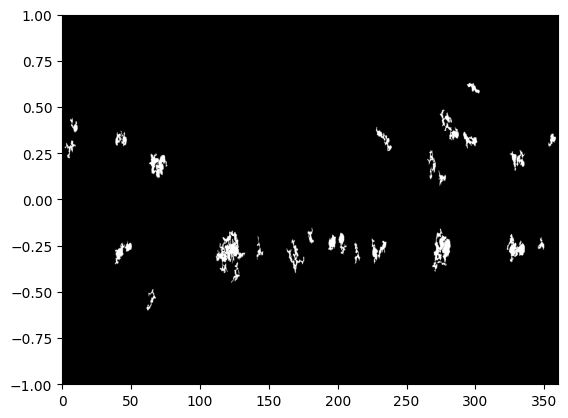

In [29]:
plt.imshow(mask_filtered, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect="auto" )


In [30]:
y_indices, x_indices = np.where(mask_filtered==1)

lat=sin_lat[y_indices]
lon=longitude[x_indices]
mask=(lat<=0)& (lat>=-1)
crop_lat=lat[mask]
crop_lon=lon[mask]
output=np.column_stack((crop_lon,crop_lat))
print(output)
lat_rad=((crop_lat)*np.pi)/180
output2=np.column_stack((crop_lat,lat_rad))
print(output2)

[[ 6.22172826e+01 -6.03336423e-01]
 [ 6.23173104e+01 -6.03336423e-01]
 [ 6.24173381e+01 -6.03336423e-01]
 ...
 [ 1.81350375e+02 -1.56626506e-01]
 [ 1.81450403e+02 -1.56626506e-01]
 [ 1.81550431e+02 -1.56626506e-01]]
[[-0.60333642 -0.01053021]
 [-0.60333642 -0.01053021]
 [-0.60333642 -0.01053021]
 ...
 [-0.15662651 -0.00273365]
 [-0.15662651 -0.00273365]
 [-0.15662651 -0.00273365]]


In [33]:
y=-0.25+np.sin(crop_lat)

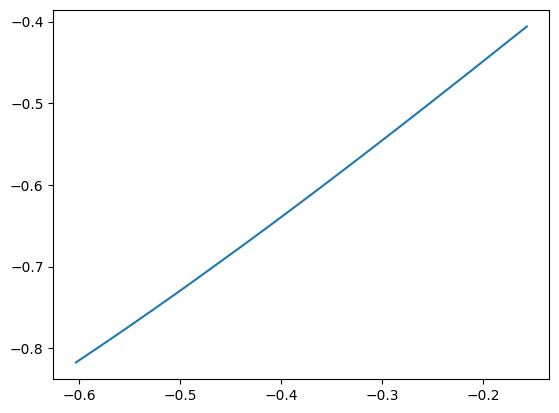

In [34]:
plt.plot(crop_lat,y)


In [ ]:
mask= (lat<=1)  & (lat>=0)

crop_lat=lat[mask]
crop_lon=lon[mask]
output=np.column_stack((crop_lon,crop_lat))
print(output)

[[2.74076132e+02 7.13623726e-02]
 [2.73976104e+02 7.32159407e-02]
 [2.74076132e+02 7.32159407e-02]
 ...
 [2.96182273e+02 6.27432808e-01]
 [2.96282301e+02 6.27432808e-01]
 [2.96382328e+02 6.27432808e-01]]


In [40]:
x=np.linspace(0,360,60)
X=(x*np.pi)/180
y=0.25+np.sin(X)

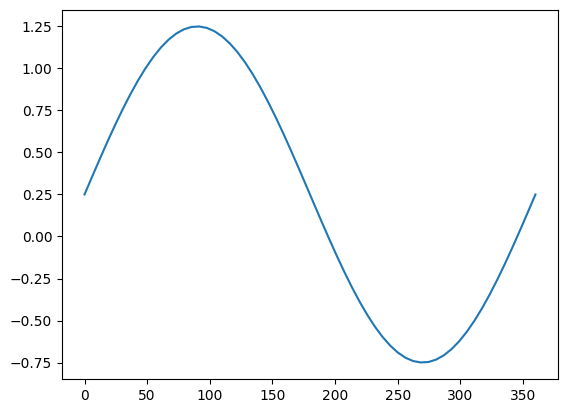

In [41]:
plt.plot(x,y)